<a href="https://colab.research.google.com/github/dipakpatil2001/Zomato-Restaurant-Clustering-And-Sentiment-Analysis-Unsupervised-ML/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Dipak Balram Patil

# **Project Summary -**

Business Context


---


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities. India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.


**There are two files of dataset, while the columns are self explanatory. Below is a brief description:**

> **Zomato Restaurant names and Metadata**

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings


> **Zomato Restaurant reviews**

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review


>Restaurant names and Metadata - This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Restaurant reviews - Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.




# **GitHub Link -**

Provide your GitHub Link here. [Zomato-Restaurant-Clustering-And-Sentiment-Analysis-Unsupervised-ML](https://github.com/dipakpatil2001/Zomato-Restaurant-Clustering-And-Sentiment-Analysis-Unsupervised-ML/tree/main)

# **Problem Statement**


The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and make some useful conclusions in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

**This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis.**

**Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [297]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import gensim

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [298]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [299]:
# Load Dataset
meta_df = pd.read_csv('/content/drive/MyDrive/CD/Data science /Projects and all/Zomato Restaurant names and Metadata.csv') # Zomato Restaurant names and Metadata
rev_df = pd.read_csv('/content/drive/MyDrive/CD/Data science /Projects and all/Zomato Restaurant reviews.csv')             # Zomato Restaurant reviews

### Dataset First View

In [300]:
# Dataset First Look
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [301]:
rev_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [302]:
# Dataset Rows & Columns count
print( f'Dataset \033[4mZomato Restaurant names and Metadata\033[0m contains \033[1m{meta_df.shape[0]}\033[0m rows and \033[1m{meta_df.shape[1]}\033[0m columns.')
print( f'Dataset \033[4mZomato Restaurant reviews\033[0m contains \033[1m{rev_df.shape[0]}\033[0m rows and \033[1m{rev_df.shape[1]}\033[0m  columns.')

Dataset Zomato Restaurant names and Metadata contains 105 rows and 6 columns.
Dataset Zomato Restaurant reviews contains 10000 rows and 7  columns.


### Dataset Information

In [303]:
# Dataset Info of Zomato Restaurant names and Metadata
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [304]:
# Dataset Info of Zomato Restaurant reviews
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [305]:
# Dataset Duplicate Value Count in Zomato Restaurant names and Metadata
meta_df.duplicated().sum()

0

In [306]:
# Checking duplicate restaurant name.
meta_df['Name'].duplicated().sum()

0

In [307]:
# Dataset Duplicate Value Count in Zomato Restaurant reviews
rev_df.duplicated().sum()

36

#### Missing Values/Null Values

In [308]:
# Missing Values/Null Values Count
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [309]:
rev_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [310]:
for dataset in (meta_df, rev_df):
  print(dataset.shape)

(105, 6)
(10000, 7)


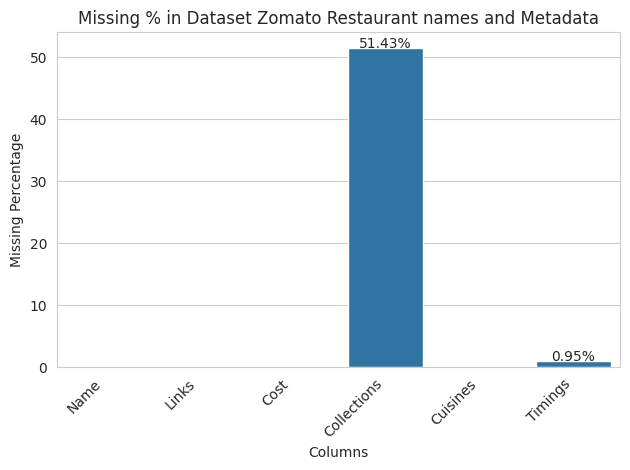

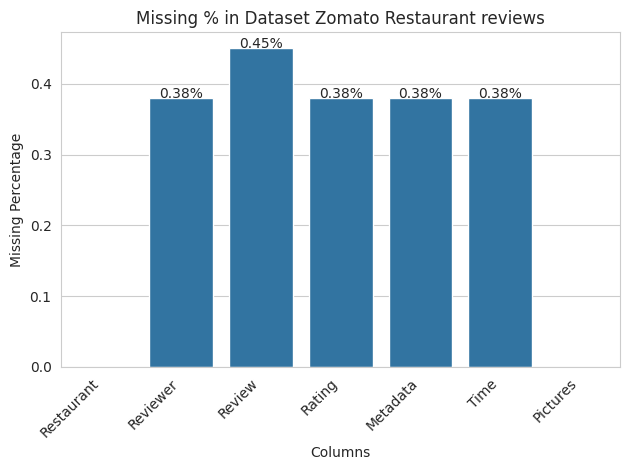

In [311]:
# Visualizing the missing values
count=0
for dataset in (meta_df, rev_df):
  missing_percentage = dataset.isnull().sum()/dataset.shape[0] *100
  # missing_percentage.plot(kind='bar', color='skyblue')
  sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
  plt.xlabel('Columns')
  plt.ylabel('Missing Percentage')
  if count == 0:
    plt.title(f'Missing % in Dataset Zomato Restaurant names and Metadata')
    count +=1
  else:
    plt.title(f'Missing % in Dataset Zomato Restaurant reviews')

  plt.xticks(rotation=45, ha='right')

  # Adding annotations on top of the bars
  for index, value in enumerate(missing_percentage.values):
    if value > 0: # Only annotate bars with missing values
        plt.text(index, value, f'{value:.2f}%', ha='center')

  plt.tight_layout()
  plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [312]:
# Dataset Columns
print(f'Columns in Zomato Restaurant names and Metadata: {meta_df.columns.tolist()}')
print(f'Columns in Zomato Restaurant reviews: {rev_df.columns.tolist()}')

Columns in Zomato Restaurant names and Metadata: ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Columns in Zomato Restaurant reviews: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [313]:
# Dataset Describe
meta_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [314]:
rev_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [315]:
meta_df.head(2)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM


In [316]:
rev_df.head(1)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0


### Variables Description

## **Zomato Restaurant names and Metadata**


1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**


1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [317]:
# Check Unique Values for each variable.
print(meta_df.nunique())
print(20*"_")
print(rev_df.nunique())

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64
____________________
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


In [318]:
meta_df.apply(lambda x: x.unique())

Name           [Beyond Flavours, Paradise, Flechazo, Shah Gho...
Links          [https://www.zomato.com/hyderabad/beyond-flavo...
Cost           [800, 1,300, 1,200, 1,500, 500, 300, 1,000, 35...
Collections    [Food Hygiene Rated Restaurants in Hyderabad, ...
Cuisines       [Chinese, Continental, Kebab, European, South ...
Timings        [12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)...
dtype: object

In [319]:
rev_df.apply(lambda x: x.unique())

Restaurant    [Beyond Flavours, Paradise, Flechazo, Shah Gho...
Reviewer      [Rusha Chakraborty, Anusha Tirumalaneedi, Asho...
Review        [The ambience was good, food was quite good . ...
Rating           [5, 4, 1, 3, 2, 3.5, 4.5, 2.5, 1.5, Like, nan]
Metadata      [1 Review , 2 Followers, 3 Reviews , 2 Followe...
Time          [5/25/2019 15:54, 5/25/2019 14:20, 5/24/2019 2...
Pictures      [0, 8, 1, 7, 2, 6, 3, 5, 9, 4, 16, 26, 10, 15,...
dtype: object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [320]:
meta_df.shape  # current size of Meta data

(105, 6)

In [321]:
meta_df['Cost'].dtype

dtype('O')

In [322]:
# Write your code to make your dataset analysis ready.
# Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'.
meta_df['Cost'] =  meta_df['Cost'].str.replace(",","").astype('int64')

Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'

In [323]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [324]:
rev_df.shape # current size of Review Data

(10000, 7)

In [325]:
# missing values in review data
null_info = pd.DataFrame({'Feature': rev_df.columns,
                          'Count':rev_df.isnull().sum(),
                          'Percentage':rev_df.isnull().sum()/rev_df.shape[0]*100})
null_info = null_info.reset_index(drop=True)
null_info

,Feature,Count,Percentage
0,Restaurant,0,0.00
1,Reviewer,38,0.38
2,Review,45,0.45
3,Rating,38,0.38
4,Metadata,38,0.38
5,Time,38,0.38
6,Pictures,0,0.00


As we can see, there are few missing values, so I decide to drop them all because there isn't a big loss

In [326]:
rev_df.dropna(inplace =True)
rev_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [327]:
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


This notebook will use bokeh and plotly to see ratings, reviews and cost relationships , will use NLTK,gensim, to convert text to vectors to find relationships between text. We will also see wordclouds.

In [328]:
rev_df.Rating.value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [329]:
# proportion of occurrences for each unique value in the Rating column.
rev_df['Rating'].value_counts(normalize=True)

5       0.384329
4       0.238373
1       0.174284
3       0.119739
2       0.068709
4.5     0.006931
3.5     0.004721
2.5     0.001909
1.5     0.000904
Like    0.000100
Name: Rating, dtype: float64

In [330]:
# Removing like value and taking the mean in the rating column.
rev_df.loc[rev_df['Rating'] == 'Like', 'Rating'] = np.nan

 # Chenging the data type of rating column
rev_df['Rating']= rev_df['Rating'].astype('float64')

print(rev_df['Rating'].mean())

3.600261201527024


In [331]:
rev_df.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        1
Metadata      0
Time          0
Pictures      0
dtype: int64

In [332]:
# Filling mean in place of null value
rev_df['Rating'].fillna(3.6, inplace=True)

In [333]:
# Changing the data type of review column.
rev_df['Review'] = rev_df['Review'].astype(str)

# Creating a review_length column to check the frequency of each rating.
rev_df['Review_length'] = rev_df['Review'].apply(len)

In [334]:
rev_df['Rating'].value_counts(normalize=True)

5.0    0.384329
4.0    0.238373
1.0    0.174284
3.0    0.119739
2.0    0.068709
4.5    0.006931
3.5    0.004721
2.5    0.001909
1.5    0.000904
3.6    0.000100
Name: Rating, dtype: float64

In [335]:
rev_df['Rating'].describe()

count    9955.000000
mean        3.600261
std         1.483498
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

The Ratings distribution 38% reviews are 5 rated,23% are 4 rated stating that people do rate good food high.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

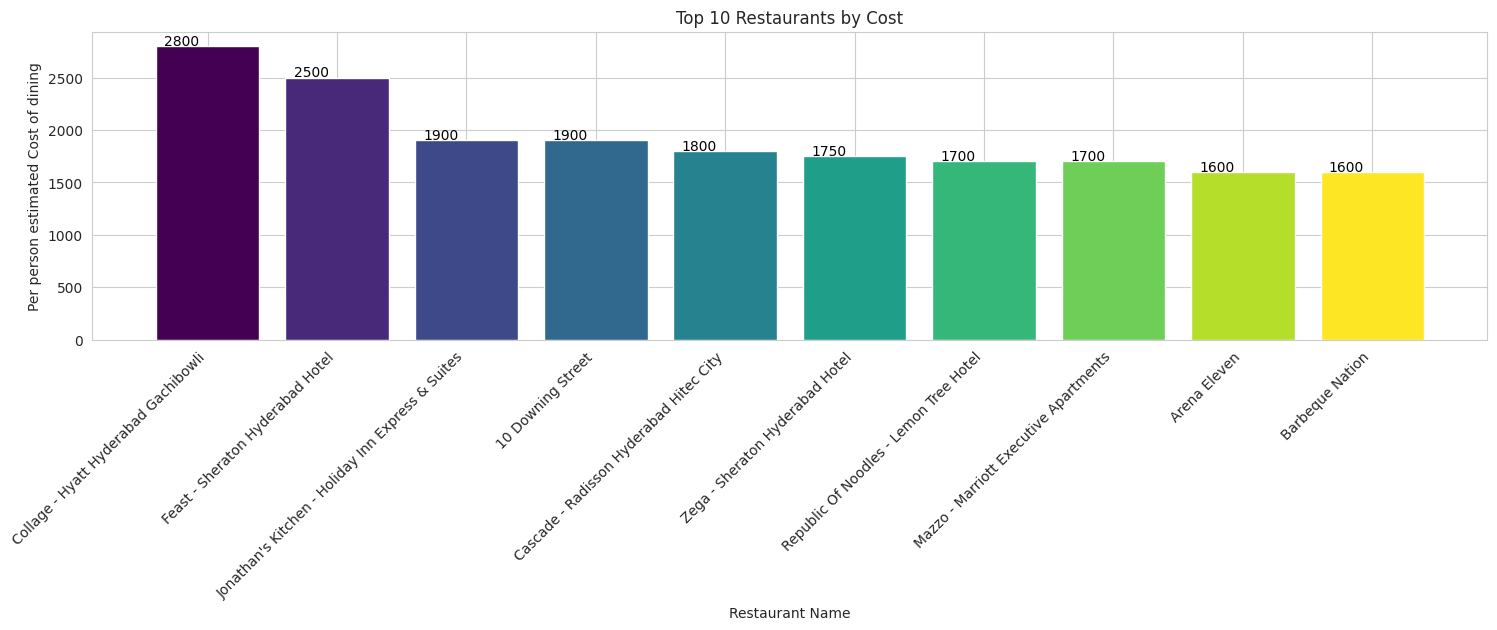

In [336]:
# Chart - 1 visualization code
# top 10 restaurants by cost
top10_res_by_cost = meta_df[['Name', 'Cost']].sort_values(by='Cost', ascending=False).head(10).reset_index(drop=True)
# Plotting a colorful bar chart for the top 10 restaurants by cost
plt.figure(figsize=(18, 4))

# Define colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(top10_res_by_cost)))

# Plotting the bars with different colors
bars = plt.bar(top10_res_by_cost['Name'], top10_res_by_cost['Cost'], color=colors)

# # Adding a colorbar for reference
# cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
# cbar.set_label('Total Cost')

plt.xlabel('Restaurant Name')
plt.ylabel('Per person estimated Cost of dining')
plt.title('Top 10 Restaurants by Cost')
plt.xticks(rotation=45, ha='right')
plt.xticks(size = 10)

# Adding values on top of the bars for better visibility
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 10,
             round(bar.get_height(), 2), ha='center', color='black')

plt.show()


##### 1. Why did you pick the specific chart?

The colorful bar chart was chosen for its effectiveness in visually comparing the total costs of the top 10 restaurants. Bar charts are well-suited for representing categorical data with numerical values, and the addition of color provides a visually appealing and easily interpretable way to differentiate between restaurant costs. The rotated x-axis labels improve readability, making it a suitable choice for conveying insights about the relative expenses of each restaurant in a concise and visually impactful manner.

##### 2. What is/are the insight(s) found from the chart?

The colorful bar chart visually highlights the varying total costs of the top 10 restaurants. It reveals distinct cost differences among the establishments, allowing for quick identification of higher and lower-cost options. The color variation adds emphasis to these distinctions, aiding in the clear interpretation of relative expenses for each restaurant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from the colorful bar chart, showcasing varying total costs among the top 10 restaurants, can potentially contribute to positive business impact. Identifying high-cost and low-cost performers allows businesses to strategize pricing, optimize offerings, and understand market positioning. However, negative growth may occur if the insights reveal disproportionately high costs without corresponding value or if lower-cost options are perceived negatively in terms of quality. Adjusting pricing strategies or addressing perceived value discrepancies could mitigate potential negative impacts and foster positive growth.

#### Chart - 2

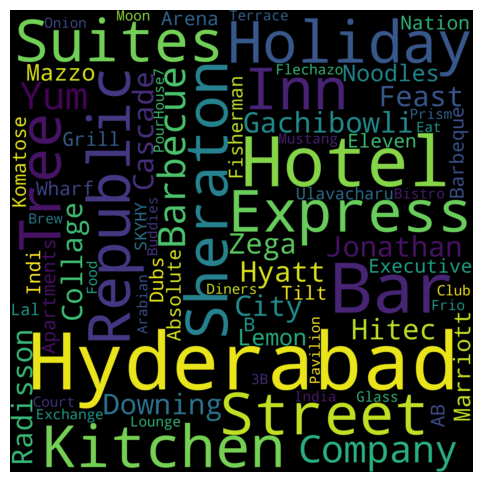

In [337]:
# Chart - 2 visualization code
plt.figure(figsize=(12,6))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(width=2160, height= 2160, collocations=False, background_color='black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off");

##### 1. Why did you pick the specific chart?

Word Cloud is chosen based on its ability to visually represent the frequency of restaurant names in a visually engaging and informative manner. It's particularly suitable for conveying the prominence of specific restaurants within the provided text.

##### 2. What is/are the insight(s) found from the chart?

In summary, the Word Cloud visualization of restaurant names provides the following insights:

* Prominence of Specific Restaurants:

Larger and bolder words indicate the prominence of specific restaurants, suggesting that they are mentioned more frequently or have higher costs compared to others.
* Diversity in Options:

The Word Cloud showcases a diverse range of restaurant names, reflecting the variety of options mentioned in the text.
*Identification of Key Players:

Viewers can easily identify key players or popular choices based on the size and prominence of the restaurant names in the Word Cloud.
* Engaging and Visual Representation:

The Word Cloud offers an engaging and visually appealing representation of the data, making it easy for viewers to explore and interpret.
* Potential Focus on High-Cost Restaurants:

If generated based on costs, the Word Cloud highlights high-cost restaurants, aiding in the identification of establishments contributing significantly to the total cost.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Bussiness Impact:**

Identification of popular restaurants can inform targeted marketing efforts and promotions.

Understanding customer preferences allows businesses to tailor offerings to meet expectations.

Opportunities for strategic partnerships or collaborations with key players may arise.

Informed operational decisions, such as optimizing inventory and staffing, can enhance efficiency.

**Considerations for Challenges:**

Overemphasis on a few prominent restaurants may limit diversity in offerings.

Ensuring customer satisfaction remains crucial, even with popular options.

Pricing strategies should align with market trends and competitive landscapes.

Adaptability to evolving market trends is essential for sustained growth.

#### Chart - 3

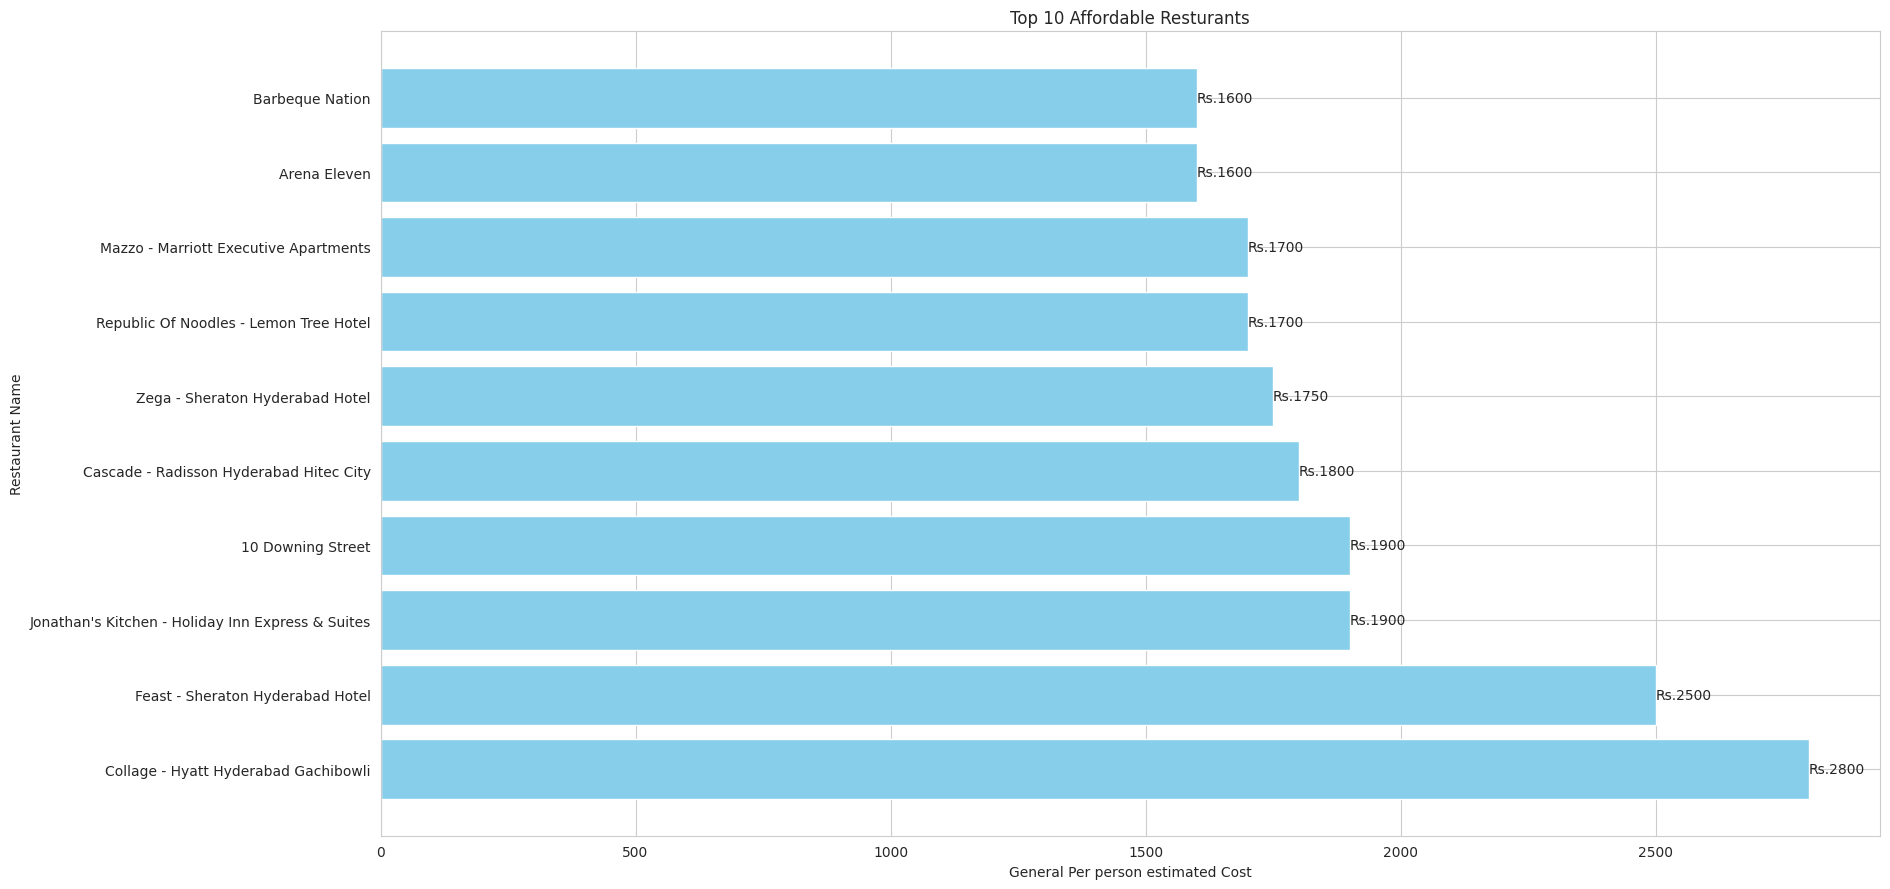

In [338]:
# Chart - 3 visualization code
top_10_affor_rest=meta_df[['Name', 'Cost']].sort_values(by='Cost', ascending=False).head(10).reset_index(drop=True).tail(10)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming meta_df is your DataFrame
plt.figure(figsize=(19,9))
bars = plt.barh(top_10_affor_rest['Name'], top_10_affor_rest['Cost'], color='skyblue')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"Rs.{bar.get_width()}", ha='left', va='center')

plt.xlabel('General Per person estimated Cost')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Affordable Resturants')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The choice of a horizontal bar chart for visualizing the top 10 affordable restaurants is based on its effectiveness in:

Comparing Values: The layout allows for a clear comparison of 'Cost' values among different restaurants.

Top-N Analysis: It is well-suited for displaying the top 10 affordable restaurants.

Readability: Horizontal bars accommodate longer category names, ensuring readability.

Sequential Order: The horizontal layout naturally orders bars based on 'Cost,' aiding intuitive interpretation.

Cost Annotations: Placement of cost annotations is convenient at the end of each bar.

Visual Appeal: Bar charts are visually appealing and widely used for comparative data presentation.

##### 2. What is/are the insight(s) found from the chart?


1.   Identification of most affordable options.
2. Comparison of affordability among restaurants.
3. Showcase of a diverse range of affordable choices.
4. Display of individual cost breakdown for each restaurant.
5. Recognition of prominent affordable restaurants.
6. Decision support for customers seeking budget-friendly options.
7. Potential marketing insights for restaurant owners and marketers.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Targeted Marketing Opportunities.
Customer Retention and Loyalty.
Operational Efficiency.
Competitive Positioning.

**Potential Challenges and Negative Growth:**

Overemphasis on a Few Options.
Pricing Strategy Mismatch.
Failure to Adapt to Trends.
Inadequate Marketing Execution.
Customer Dissatisfaction.

## Text preprocessing for the meta dataset.

In Order to plot the cuisines from the data we should count the frequency of the words from the document.(Frequency of cuisine). For that We have to perform the opration like removing stop words, Convert all the text into lower case, removing punctuations, removing repeated charactors, removing Numbers and emojies and finally count vectorizer.

In [339]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [340]:
# Downloading and importing the dependancies for text cleaning.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [341]:
# Extracting the stopwords from nltk library for English corpus.
sw = (stopwords.words('english'))
print(sw) # stop words in english

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [342]:
# Creating a function for removing stopwords.
def stopwords(text):
  text = [word.lower() for word in str(text).split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [343]:
# Removing stopwords from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: stopwords(x))
meta_df.Cuisines.head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

We removed stop words successfully!!

In [344]:
# Defining the function for removing punctuation.
def remove_punctuation(text):
    import string

    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)

    # return the text stripped of punctuation marks
    return text.translate(translator)

In [345]:
# Removing punctuation from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: remove_punctuation(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

We removed Punctuations present in the text successfully!!

In [346]:
# Cleaning and removing Numbers.
# Writing a function to remove repeating characters.
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [347]:
# def remove_repeating_characters(input_str):
#     result_str = ""
#     for char in input_str:
#         # If the current character is not already in the result string, add it
#         if char not in result_str:
#             result_str += char
#     return result_str

In [348]:
# meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: remove_repeating_characters(x))
# meta_df['Cuisines'].head()

In [349]:
# Removing repeating characters from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

Removed repeated characters successfully!!

In [350]:
# Removing the Numbers from the data.
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [351]:
# Implementing the cleaning.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

We dont want numbers in the text Hence removed number successfully!!

In [352]:
# Top 20 Two word Frequencies of Cuisines.
from collections import Counter
text = ' '.join(meta_df['Cuisines'])

# separating each word from the sentences
words = text.split()
# Extracting the first word from the number for cuisines in the sentence.
two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [353]:
# Extracting the most frequent cuisine present in the collection.
# Counting a frequency for cuisines.
two_words_dfc = pd.DataFrame(two_words.items(), columns=['Cuisine Words', 'Frequency'])

# Sorting the most frequent cuisine at the top and order by descending
two_words_dfc = two_words_dfc.sort_values(by = "Frequency", ascending = False)

# selecting first top 20 frequent cuisine.
two_words_20c = two_words_dfc.iloc[:20]
two_words_20c

,Cuisine Words,Frequency
6,north indian,61
9,indian chinese,27
42,fast food,15
4,south indian,9
5,indian north,9
33,chinese north,8
24,indian continental,6
65,italian north,6
8,biryani north,6
28,food north,6


#### Chart - 4

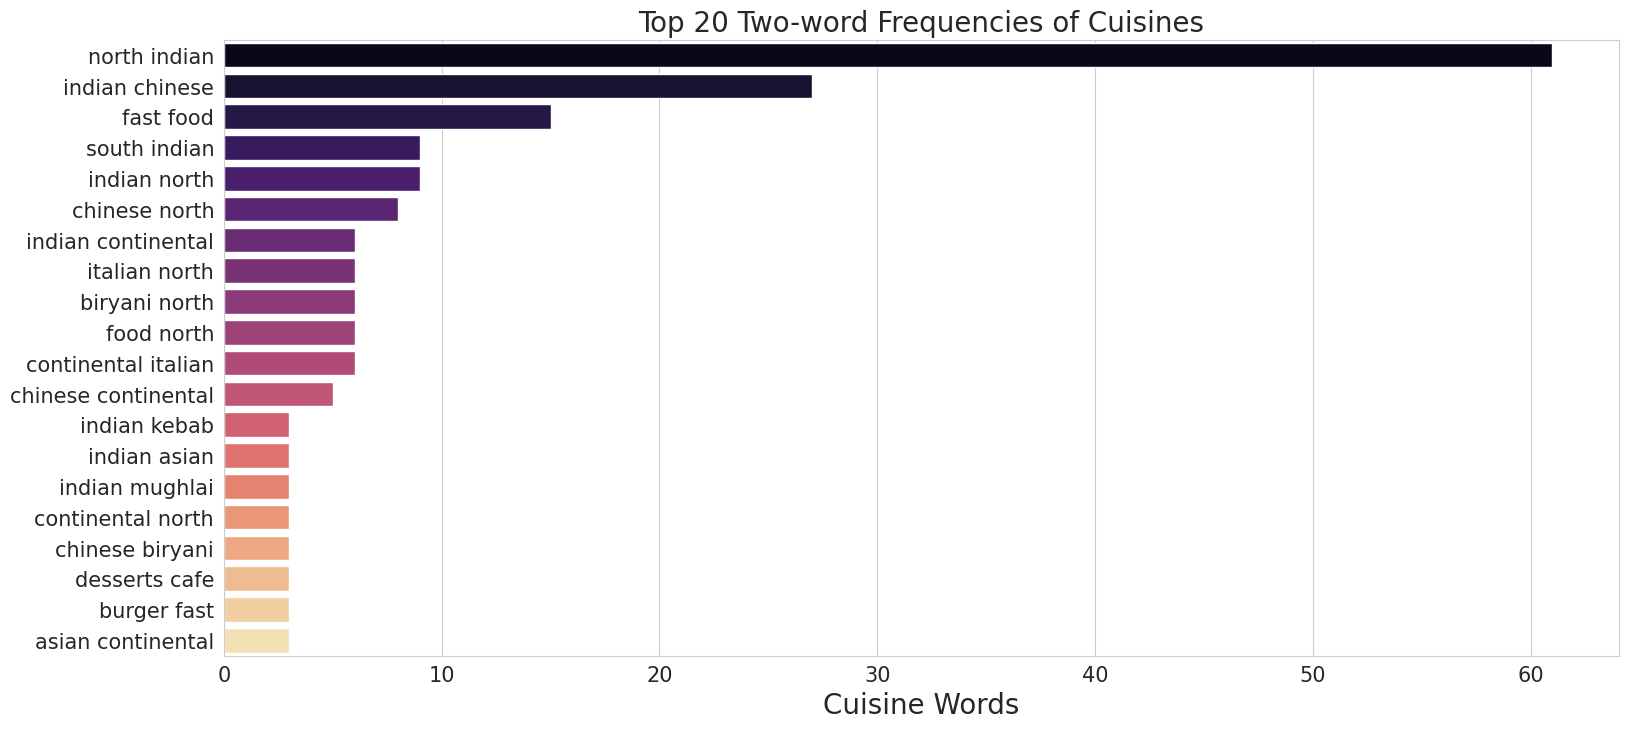

In [400]:
# Chart - 4 visualization code
# Visualizing the frequency of the Cuisines.
sns.set_style("whitegrid")
plt.figure(figsize = (18, 8))
sns.barplot(y = "Cuisine Words", x = "Frequency", data = two_words_20c, palette = "magma")
plt.title("Top 20 Two-word Frequencies of Cuisines", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Cuisine Words", size = 20)
plt.ylabel(None)
plt.savefig("Top_20_Two-word_Frequencies_of_Cuisines.png")
plt.show()

The DataFrame contains two columns: "Cuisine Words" and "Frequency." The "Cuisine Words" column lists the most frequent two-word cuisine terms, while the "Frequency" column shows the number of times each two-word cuisine term appears in the dataset.This information can be helpful in understanding the most common cuisine types in the dataset. It can also be used to identify trends and patterns in the types of cuisines that are popular or in demand among the customers

#### Chart - 5

In [355]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [356]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [357]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [358]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [359]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [360]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [361]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [362]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [363]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [364]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [365]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [366]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [367]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [368]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [369]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [370]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [371]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [372]:
# Expand Contraction

#### 2. Lower Casing

In [373]:
# Lower Casing

#### 3. Removing Punctuations

In [374]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [375]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [376]:
# Remove Stopwords

In [377]:
# Remove White spaces

#### 6. Rephrase Text

In [378]:
# Rephrase Text

#### 7. Tokenization

In [379]:
# Tokenization

#### 8. Text Normalization

In [380]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [381]:
# POS Taging

#### 10. Text Vectorization

In [382]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [383]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [384]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [385]:
# Transform Your data

### 6. Data Scaling

In [386]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [387]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [388]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [389]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [390]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [391]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [392]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [393]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [394]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [395]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [396]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [397]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [398]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [399]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***